<a href="https://colab.research.google.com/github/pintophr/Surveying_the_Future_of_Computer_and_Data_Science_Education/blob/main/Data_Analysis_After_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Settings
### Preparing the programming environment for data analysis.

In [1]:
# Facilities required for installation.
!pip install pingouin
!pip install factor_analyzer
!pip install rpy2==3.4.5 pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=942ccf9b70694e1d9ec897f5bba802155db3026324968b30aae6b505fab0ceb7
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 85.0 MB/s eta 0:00:00
  Created wheel for rpy2: filename=rpy2-3.4.5-cp310-cp310-linux_x86_64.whl size=299868 sha256=fa5407b3b4598ad0f56d7e82956014b0f4feeaf2c63f79b4

In [2]:
# Importing libraries.
import pandas as pd # A powerful data manipulation and analysis tool.
import pingouin as pg # Statistical calculation (based on pandas).
import numpy as np # Linear algebra.
import matplotlib.pyplot as plt # An interface for plotting graphs.
import seaborn as sns # Data visualization (based on matplotlib).
import io # Standard Python library for handling various types of input and output operations.
import warnings # # Offers a way to manage warnings raised during runtime.
import textwrap # Wrapping and formatting plain text.
import rpy2.robjects as robjects # Allows Python to interface with the R language.


from matplotlib.colors import ListedColormap # Custom colormap for matplotlib.
from google.colab import files #  A module in Google Colab for handling files.
from scipy.stats import spearmanr # Spearman's correlation.
from factor_analyzer import FactorAnalyzer # EFA.
from factor_analyzer.factor_analyzer import calculate_kmo # KMOs' test.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity # Bartletts' test.
from rpy2.robjects.packages import importr # A function to import R packages.
from rpy2.robjects import pandas2ri # A module to convert between pandas and R data structures.
from rpy2.robjects.vectors import StrVector # A class for handling R's string vectors.

In [3]:
# Ignoring Future Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Integrating the R language into this programming environment.

In [4]:
# Load the R magic extension.
%load_ext rpy2.ipython

In [5]:
%%R

# Package required for R's environment.
install.packages(c("psych", "GPArotation"))

# Loading packages.
library(psych) # psych: designed for multivariate analysis and psychological research.
library(GPArotation) # GPArotation: designed for factorial analysis.

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpECCDE7/downloaded_packages’

Attaching package: ‘GPArotation’



    equamax, varimin




### Loading CI/UFPB students' dataset.


In [6]:
# Delete all datasets loaded.
!rm *.csv

# Loading CI/UFPB students' data
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['LLMs_dataset(UFPB).csv']), encoding='ISO-8859-1', delimiter=';')

rm: cannot remove '*.csv': No such file or directory


Saving LLMs_dataset(UFPB).csv to LLMs_dataset(UFPB).csv


# 2. Exploratory Analysis

### Checking the database columns.

In [7]:
# Questionnaires' columns.
pd.DataFrame(df.columns, columns=['Column Name'])

,Column Name
0,Li e compreendi que a qualquer momento posso d...
1,Qual é o seu gênero?
2,Qual é o seu curso?
3,"Em qual categoria você se encontra, aproximada..."
4,"Qual a sua idade, aproximadamente?"
5,Qual seu nível de conhecimento sobre LLMs (Cha...
6,Quais LLMs você utiliza?
7,Sinto que aprendo o que realmente me interessa...
8,"Muitas vezes, fico tão empolgado que perco a n..."
9,"LLMs (ChatGPT, Bard etc.) tornam a programação..."


In [8]:
# Checking for missing values.
valores_nulos = df.isnull().sum().sum()
print(f'NaNs: {valores_nulos}')

NaNs: 0


### Creating a chart to visualize the gender frequencies.

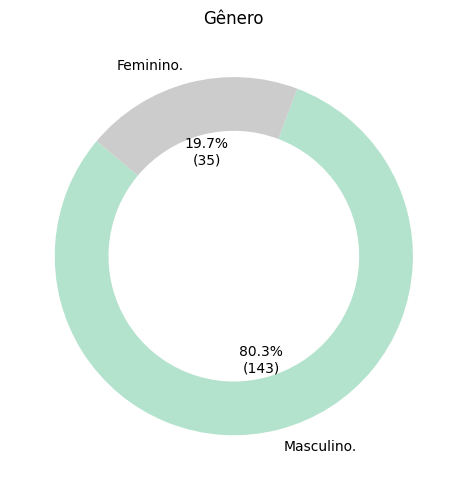

In [9]:
gender_counts = df["Qual é o seu gênero?"].value_counts()

# Function to display percentage and count on pie chart.
def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Gender Chart.
fig, ax = plt.subplots(figsize=(6, 5)) # Adjusting figure size to better fit a single chart
colors_gender = plt.cm.Pastel2(np.linspace(0, 1, len(gender_counts)))
gender_counts.plot(kind='pie', ax=ax, colors=colors_gender, autopct=lambda pct: func(pct, gender_counts), startangle=140, wedgeprops=dict(width=0.3))
ax.set_title('Gênero')
ax.set_ylabel('')  # Removing y-axis label to clean up the chart

plt.tight_layout()
plt.show()


### Cheking how the data are scored.

In [10]:
# Finding the maximum and minimum value in a sample.
minimum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].min()
maximum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].max()

# Displaying the values found.
print("minimum_value:", minimum_value)
print("maximum value:", maximum_value)

minimum_value: 0
maximum value: 6


### Adjusting Linkert Scales from 0-6 to 1-7.
The interval between 0 and 6 does not exist a real midpoint, considering that they are ordinal scales.

In [11]:
# It is better to have a true midpoint on the scales for performing data analysis.On dataset, all scales are rated from 0 to 6. So the convertion is needed.
# List of columns (items) you want to adjust.
itens = [
    'Qual seu nível de conhecimento sobre LLMs (ChatGPT, Bard etc.)?',
    'Sinto que aprendo o que realmente me interessa no meu curso.',
    'Muitas vezes, fico tão empolgado que perco a noção do tempo quando estou envolvido em um projeto ou atividade acadêmica.',
    'LLMs (ChatGPT, Bard etc.) tornam a programação mais democrática e acessível para as pessoas.',
    'Me sinto confiante com os textos e/ou códigos gerados por LLMs (ChatGPT, Bard etc.).',
    'Nunca me sinto capaz de alcançar meus objetivos acadêmicos.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.',
    'Para mim, aprender sobre programação é um interesse pessoal.',
    'Prefiro programar sem ajuda de LLMs (ChatGPT, Bard etc.).',
    'Me divirto quando aprendo e adquiro novos conhecimentos sobre tecnologia.',
    'As demandas do meu curso me deixam emocionalmente cansado(a).',
    'Acredito que LLMs (ChatGPT, Bard etc.) podem ser melhor exploradas pelos professores nas aulas, atividades e/ou provas.',
    'Gosto de ir em todos as aulas do meu curso.',
    'Sinto que tenho as habilidades necessárias para ir bem em provas de programação.',
    'Não tenho interesse em programação competitiva (ICPC, CodeJam etc.).',
    'Penso que LLMs (ChatGPT, Bard etc.) são muito eficientes em programação.',
    'Tento me envolver em atividades extracurriculares do curso para me destacar.',
    'Tenho dificuldade para relaxar depois das aulas.',
    'Sinto que estou apenas memorizando informações em vez de realmente entender os conteúdos.',
    'Me preocupo que programadores sejam substituídos pelos modelos de inteligência artificial.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para formular e resolver atividades de programação.',
    'Sou pressionado pelas demandas do curso.',
    'Corrijo meus códigos utilizando LLMs (ChatGPT, Bard etc.).',
    'Fico esgotado quando tenho que ir à universidade.',
    'Tenho dificuldade para encontrar erros em respostas e códigos gerados por LLMs (ChatGPT, Bard etc.).',
    'Deixo para estudar para as provas de última hora.',
    'Tenho medo que modelos de inteligência artificial tornem conteúdos que aprendi na faculdade obsoletos.',
    'Tento ir bem nas provas para agradar meus professores.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para planejar meus estudos em programação.',
    'Sinto como se não pudesse acompanhar as mudanças causadas pelos modelos de inteligência artificial.',
    'Sinto tremores ou inquietações no corpo, como nas mãos ou nas pernas.'
]

# Add 1 to each item.
for item in itens:
    df[item] = df[item] + 1

# Finding the maximum and minimum value in a sample again.
minimum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].min()
maximum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].max()

# Displaying the values found.
print("minimum_value:", minimum_value)
print("maximum value:", maximum_value)

minimum_value: 1
maximum value: 7


# 3. Exploartory Factorial Analysis (EFA)

### Preparing the instruments' dataframes with respective items.

In [12]:
# Dictionary containing descriptions for scales.
nomes_descritivos = {
    'scale_disfunctional_strategies': 'DLS/LLMs-3\n',
    'scale_metacognitive_strategies': 'MLS/LLMs-3\n',
}

# Dictionary containing the number of items in each scale.
num_items = {
    "scale_disfunctional_strategies": 3,
    "scale_metacognitive_strategies": 3
}

# Group scale items into separate dataframes.
# Dividing items (columns) into lists that correspond to psychometric scales.
scale_metacognitive_strategies = [
    'Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para formular e resolver atividades de programação.',
    'Corrijo meus códigos utilizando LLMs (ChatGPT, Bard etc.).'
]

scale_disfunctional_strategies = [
    'Deixo para estudar para as provas de última hora.',
    'Tenho dificuldade para encontrar erros em respostas e códigos gerados por LLMs (ChatGPT, Bard etc.).',
    'Sinto que estou apenas memorizando informações em vez de realmente entender os conteúdos.'
]

scale_learning_strategies = [
    'Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para formular e resolver atividades de programação.',
    'Corrijo meus códigos utilizando LLMs (ChatGPT, Bard etc.).',
    'Deixo para estudar para as provas de última hora.',
    'Tenho dificuldade para encontrar erros em respostas e códigos gerados por LLMs (ChatGPT, Bard etc.).',
    'Sinto que estou apenas memorizando informações em vez de realmente entender os conteúdos.'
]

# Creating the dataframes of psychometric scales
df_scale_metacognitive_strategies = df[scale_metacognitive_strategies]
df_scale_disfunctional_strategies = df[scale_disfunctional_strategies]
df_scale_learning_strategies = df[scale_learning_strategies]

### Creating a dataframe for the somatory of the scales.

In [13]:
# List with the names of the scales.
scales_names = ['scale_disfunctional_strategies', 'scale_metacognitive_strategies']

# Sum of the scales.
for scale in scales_names:
    df['Sum_' + scale] = globals()[f'df_{scale}'].sum(axis=1)

In [14]:
# Loading scales dataframes to Rs' enviroment.
%R -i df_scale_learning_strategies

### Samples Adequacy for Structural Detection


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


KMO Test: 0.682
Bartlett's Test of Sphericity: chi-square=219.646, p-value=2.1e-38


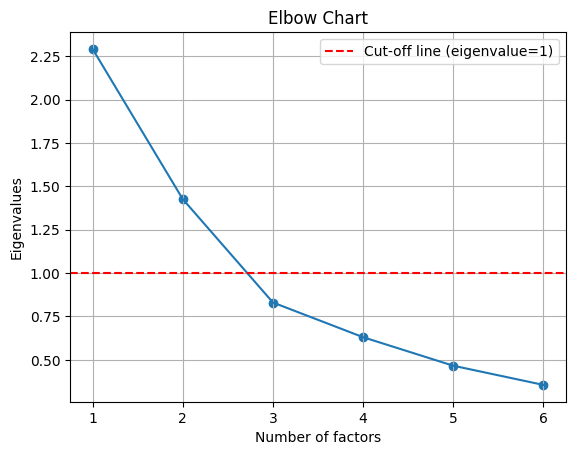

In [15]:
# Setting data.
data = df_scale_learning_strategies

# Extracting factors using the Principal Axis Factoring (PAF) method.
fa = FactorAnalyzer(n_factors=1, method='principal')
fa.fit(data)

# Loadings.
loadings = abs(fa.loadings_)
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Perform KMO test.
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test: {kmo_model:.3f}")

# Perform Bartlett's test of sphericity.
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's Test of Sphericity: chi-square={chi_square_value:.3f}, p-value={p_value:.3g}")

# Getting the eigenvalues based on Kaiser criterion.
eigen_values, vectors = fa.get_eigenvalues()

# Create Elbow Chart.
plt.scatter(range(1,data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)

# Add the cut line.
plt.axhline(y=1, color='r', linestyle='--', label='Cut-off line (eigenvalue=1)')
plt.legend()

plt.title('Elbow Chart')
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

### Internal Reliability Assessment

Total Omega:  0.7613127 
Cronbach's Alpha:  0.6406201 


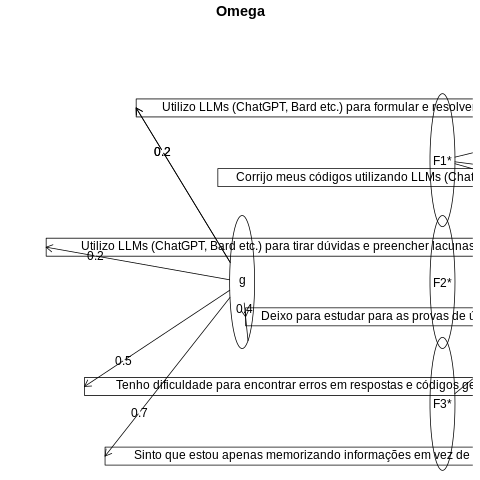

In [16]:
%%R

# Create the omega_results object
omega_results <- omega(df_scale_learning_strategies)

# Using the 'omega' function from the 'psych' package.
# The same result was obtained for different 'option' settings.
cat("Total Omega: ", omega_results$omega.tot, "\n")
cat("Cronbach's Alpha: ", omega_results$alpha, "\n")

### Loadings (PAF)

Variance Explained by each factor:
 [2.16462011 1.54688   ]
Proportional Variance Explained by each factor:
 [0.36077002 0.25781333]
Cumulative Variance Explained by each factor:
 [0.36077002 0.61858335]


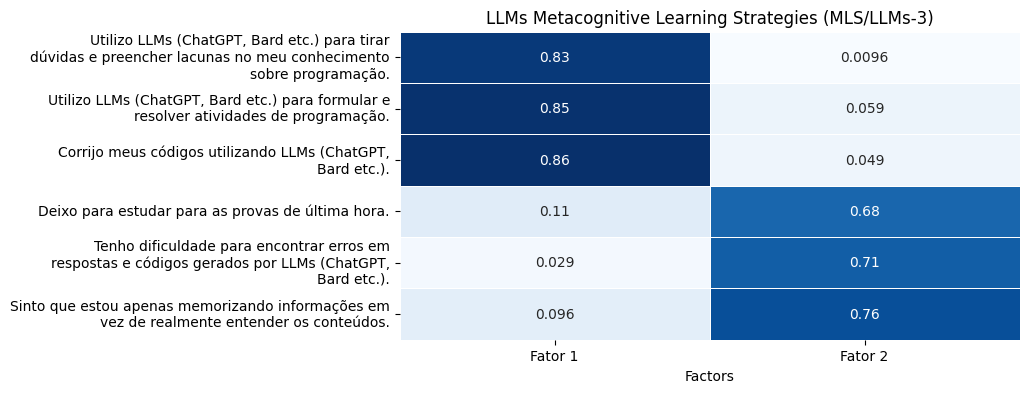

In [17]:
n_factors = 2
data = df_scale_learning_strategies

fa = FactorAnalyzer(n_factors=n_factors, rotation='promax', method='principal')
fa.fit(data)
loadings = abs(fa.loadings_)

# Variance explained by each factor.
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()
print("Variance Explained by each factor:\n", variance)
print("Proportional Variance Explained by each factor:\n", proportional_variance)
print("Cumulative Variance Explained by each factor:\n", cumulative_variance)

# Creating a heatmap of the loadings of the items with labels and adjusted cell height.
item_names = data.columns
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='Blues', linewidths=0.5,
            yticklabels=[textwrap.fill(item, 50) for item in item_names],
            xticklabels=[f'Fator {i+1}' for i in range(n_factors)], cbar=False)
plt.title('LLMs Metacognitive Learning Strategies (MLS/LLMs-3)')
plt.xlabel('Factors')
plt.show()

# 4. Descriptive Statistics

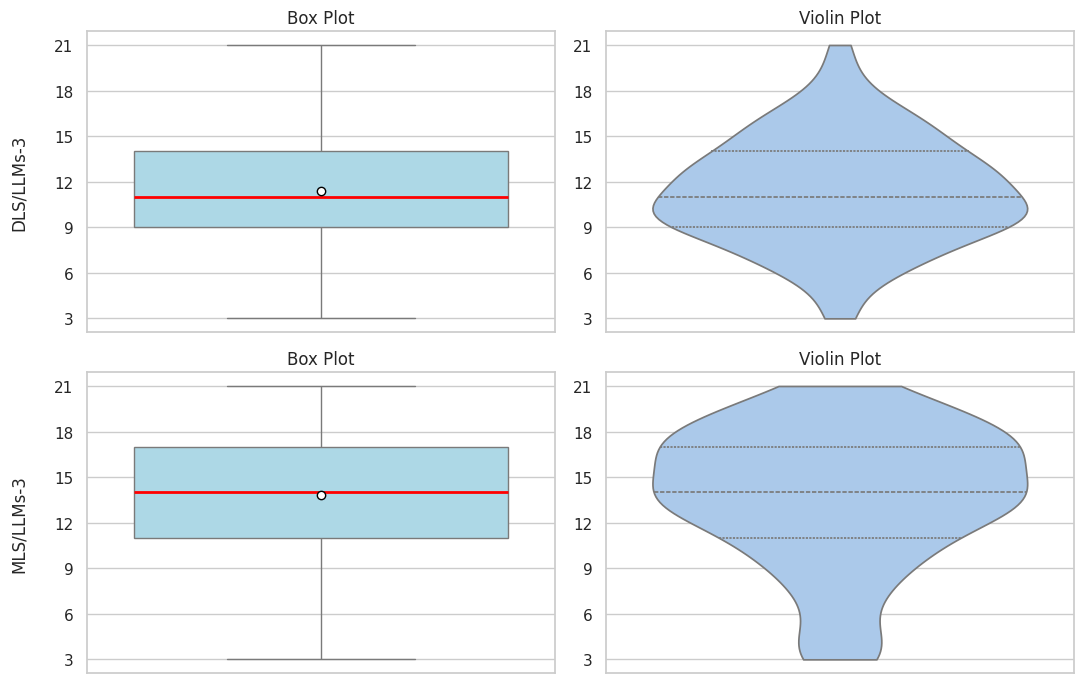

In [18]:
# Initial Seaborn settings.
sns.set_style("whitegrid")
sns.set_context("notebook")

# Dictionary containing descriptions for the scales.
nomes_descritivos = {
    'scale_disfunctional_strategies': 'DLS/LLMs-3\n',
    'scale_metacognitive_strategies': 'MLS/LLMs-3\n',
}

# Dictionary containing the number of items in each scale.
num_items = {
    "scale_disfunctional_strategies": 3,
    "scale_metacognitive_strategies": 3
}

# Properties for outliers in box plots.
flierprops = {
    'marker': 'o',
    'markerfacecolor': 'gray',
    'color': 'none',
    'markersize': 5
}

# Creating the figure and subplots for the box plots and violin plots.
fig, axes = plt.subplots(len(scales_names), 2, figsize=(11, 3.5 * len(scales_names)))

# Looping through each scale to plot.
for i, escala in enumerate(scales_names):

    # Creating the box plot on the left.
    box_plot = sns.boxplot(y=df[f"Sum_{escala}"], palette="pastel", showmeans=True,
                           meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
                           boxprops=dict(facecolor='lightblue'),
                           flierprops=flierprops, ax=axes[i, 0])

    # Adjusting the median line to be red.
    box_plot.lines[4].set(color='red', linewidth=2)

    # Setting title and y-label.
    axes[i, 0].set_title('Box Plot')
    axes[i, 0].set_ylabel(nomes_descritivos[escala])

    # Adjusting the y-axis ticks to account for the range of each item and the total number of items.
    max_val = num_items[escala] * 7
    min_val = num_items[escala]  # minimum value
    interval = (max_val - min_val) // 5  # creating intervals for better visualization
    axes[i, 0].set_yticks(list(range(min_val, max_val + 1, interval)))

    # Creating the violin plot on the right.
    violin_plot = sns.violinplot(y=df[f"Sum_{escala}"], inner="quartile", palette="pastel", cut=0, ax=axes[i, 1])
    axes[i, 1].set_title('Violin Plot')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_yticks(list(range(min_val, max_val + 1, interval)))


# Adjusting the layout.
plt.tight_layout()
plt.show()


# 5 Spearman's Correlation Test

### Gender x LSS/LLMs-6

Spearman Correlation between Sum_scale_disfunctional_strategies and Gender: -0.015, p-value: 0.843


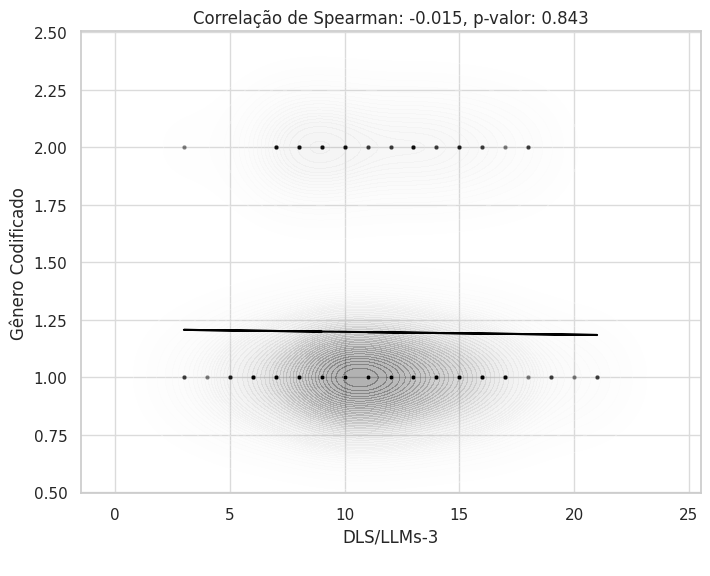

Spearman Correlation between Sum_scale_metacognitive_strategies and Gender: 0.040, p-value: 0.597


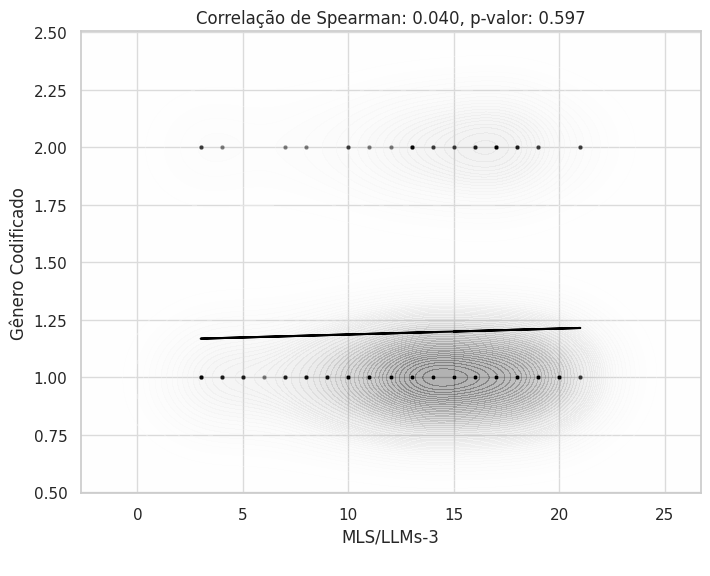

In [19]:
# Dictionary to map the genres
gender_map = {'Masculino.': 1, 'Feminino.': 2}  # Replace with gender categories you own.
df['gender_encoded'] = df['Qual é o seu gênero?'].map(gender_map)

# Calculating the Spearman and Plotando Correlation.
for scale in scales_names:
    # Calculates the correlation of Spearman.
    correlation, p_value = spearmanr(df['Sum_' + scale], df['gender_encoded'])
    print(f"Spearman Correlation between Sum_{scale} and Gender: {correlation:.3f}, p-value: {p_value:.3f}")

    plt.figure(figsize=(8, 6))

    # Calculates the density of KDE.
    sns.kdeplot(x=df['Sum_' + scale], y=df['gender_encoded'], cmap="Greys", fill=True, thresh=0, levels=50, alpha=0.3)

    # Adds the scatter chart on top.
    sns.scatterplot(x=df['Sum_' + scale], y=df['gender_encoded'], color="black", s=10, legend=False, alpha=0.5)

    # Calculates linear regression coefficients (m = slope, b = interception).
    m, b = np.polyfit(df['Sum_' + scale], df['gender_encoded'], 1)

    # Draws the line of regression.
    descriptive_name = nomes_descritivos[scale]
    plt.plot(df['Sum_' + scale], m*df['Sum_' + scale] + b, color="black")
    plt.xlabel(descriptive_name)
    plt.ylabel('Gênero Codificado')
    plt.title(f'Correlação de Spearman: {correlation:.3f}, p-valor: {p_value:.3f}')
    plt.grid(True)
    plt.show()

## 4.2 Course progress x LSS/LLMs-6

Spearman Correlation between Sum_scale_disfunctional_strategies and course progress: -0.146, p-value: 0.052


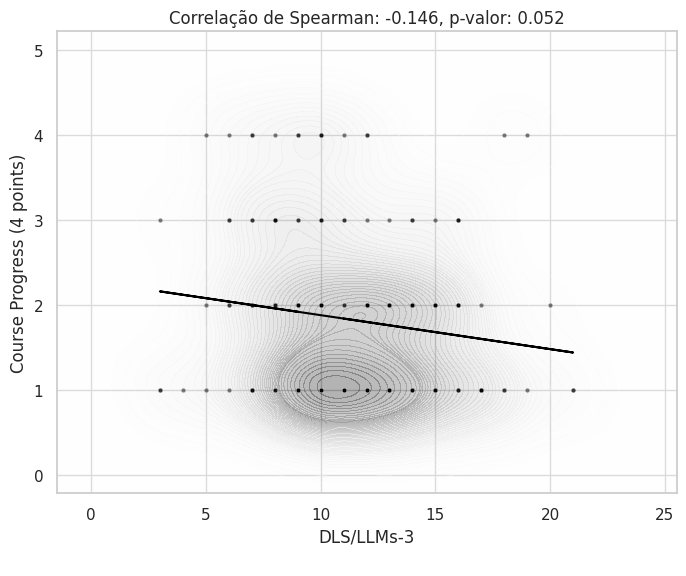

Spearman Correlation between Sum_scale_metacognitive_strategies and course progress: -0.018, p-value: 0.810


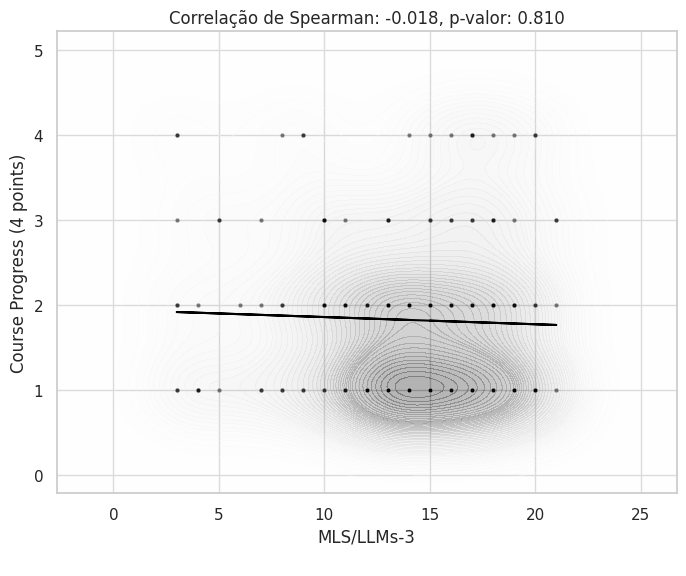

In [20]:
# Dictionary to map course progress categories.
grade_map = {
    'Estou no início do curso (até 25%).': 1,
    'Estou na primeira metade do curso (entre 25 e 50%).': 2,
    'Estou na segunda metade do curso (entre 50% e 75%).': 3,
    'Estou no final do curso (mais de 75%).': 4
}
df['grade_encoded'] = df['Em qual categoria você se encontra, aproximadamente?'].map(grade_map)

# Calculating the Spearman and Plotando Correlation.
for scale in scales_names:
    # Calculates the correlation of Spearman.
    correlation, p_value = spearmanr(df['Sum_' + scale], df['grade_encoded'])
    print(f"Spearman Correlation between Sum_{scale} and course progress: {correlation:.3f}, p-value: {p_value:.3f}")

    plt.figure(figsize=(8, 6))

    # Calculates the density of KDE.
    sns.kdeplot(x=df['Sum_' + scale], y=df['grade_encoded'], cmap="Greys", fill=True, thresh=0, levels=50, alpha=0.3)

    # Adds the scatter chart on top.
    sns.scatterplot(x=df['Sum_' + scale], y=df['grade_encoded'], color="black", s=10, legend=False, alpha=0.5)

    # Calculates linear regression coefficients (m = slope, b = interception).
    m, b = np.polyfit(df['Sum_' + scale], df['grade_encoded'], 1)

    # Draws the line of regression.
    descriptive_name = nomes_descritivos[scale]
    plt.plot(df['Sum_' + scale], m*df['Sum_' + scale] + b, color="black")
    plt.xlabel(descriptive_name)
    plt.ylabel('Course Progress (4 points)')
    plt.title(f'Correlação de Spearman: {correlation:.3f}, p-valor: {p_value:.3f}')
    plt.grid(True)
    plt.show()

## 4.3 Perceived LLMs knowledge x LSS/LLMs-6

Spearman Correlation between Sum_scale_disfunctional_strategies and perceived LLMs knowledge: -0.073, p-value: 0.333


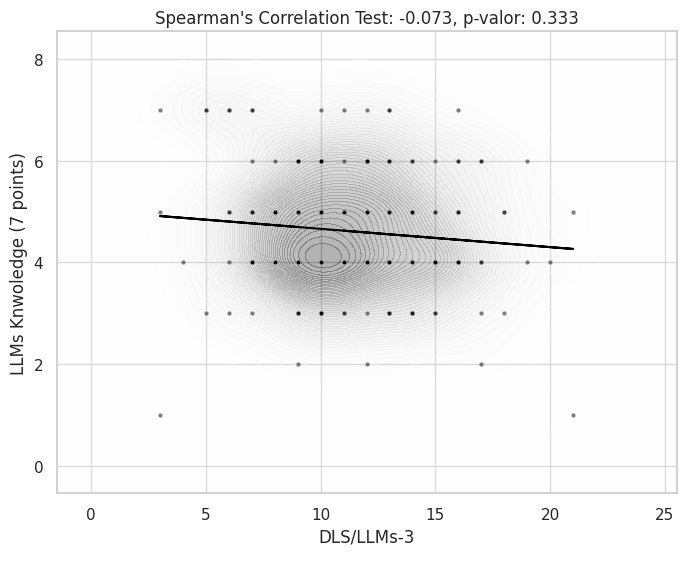

Spearman Correlation between Sum_scale_metacognitive_strategies and perceived LLMs knowledge: 0.335, p-value: 0.000


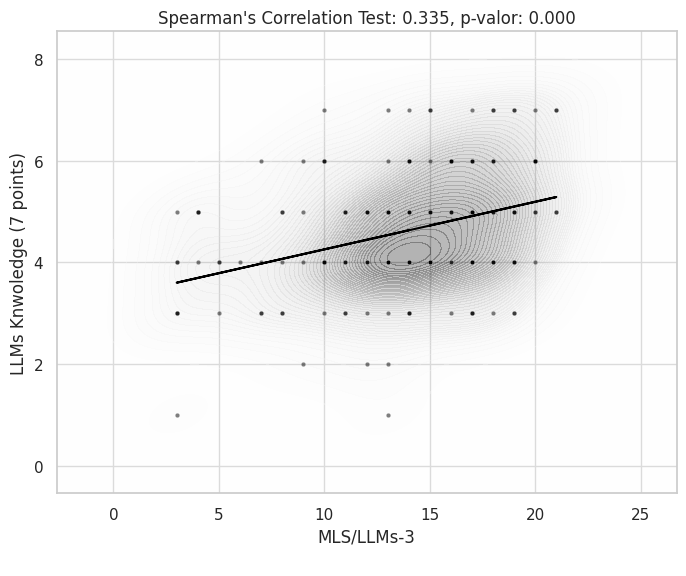

In [21]:
# Calculating the Spearman and Plotando Correlation.
for scale in scales_names:
    # Calcula a correlação de Spearman.
    correlation, p_value = spearmanr(df['Sum_' + scale], df['Qual seu nível de conhecimento sobre LLMs (ChatGPT, Bard etc.)?'])
    print(f"Spearman Correlation between Sum_{scale} and perceived LLMs knowledge: {correlation:.3f}, p-value: {p_value:.3f}")

    plt.figure(figsize=(8, 6))

    # Calculates the density of KDE.
    sns.kdeplot(x=df['Sum_' + scale], y=df['Qual seu nível de conhecimento sobre LLMs (ChatGPT, Bard etc.)?'], cmap="Greys", fill=True, thresh=0, levels=50, alpha=0.3)

    # Adds the scatter chart on top.
    sns.scatterplot(x=df['Sum_' + scale], y=df['Qual seu nível de conhecimento sobre LLMs (ChatGPT, Bard etc.)?'], color="black", s=10, legend=False, alpha=0.5)

    # Calculates linear regression coefficients (m = slope, b = interception).
    m, b = np.polyfit(df['Sum_' + scale], df['Qual seu nível de conhecimento sobre LLMs (ChatGPT, Bard etc.)?'], 1)

    # Draws the line of regression.
    descriptive_name = nomes_descritivos[scale]
    plt.plot(df['Sum_' + scale], m*df['Sum_' + scale] + b, color="black")
    plt.xlabel(descriptive_name)
    plt.ylabel('LLMs Knwoledge (7 points)')
    plt.title(f'Spearman\'s Correlation Test: {correlation:.3f}, p-valor: {p_value:.3f}')
    plt.grid(True)
    plt.show()


## 4.4 Question about feeling exhausted from university x LSS/LLMs-6

In [22]:
# Calculando a Correlação de Spearman.
for scale in scales_names:
    correlation, p_value = spearmanr(df['Sum_' + scale], df['Fico esgotado quando tenho que ir à universidade.'])
    print(f"Spearman Correlation between Sum_{scale} and felling exhausted: {correlation}, p-value: {p_value}")

Spearman Correlation between Sum_scale_disfunctional_strategies and felling exhausted: 0.4099829290666952, p-value: 1.3223974140616672e-08
Spearman Correlation between Sum_scale_metacognitive_strategies and felling exhausted: 0.06898574899906722, p-value: 0.3601963745677428


Spearman Correlation between Sum_scale_disfunctional_strategies and level of exhaustion: 0.410, p-value: 0.000


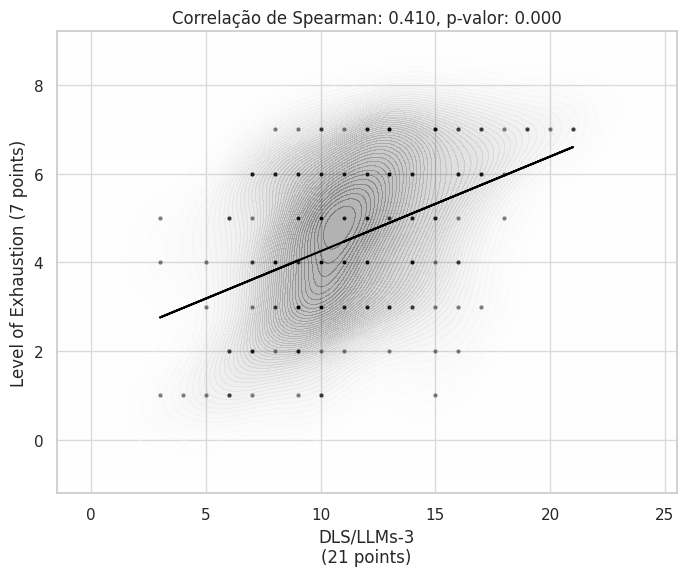

Spearman Correlation between Sum_scale_metacognitive_strategies and level of exhaustion: 0.069, p-value: 0.360


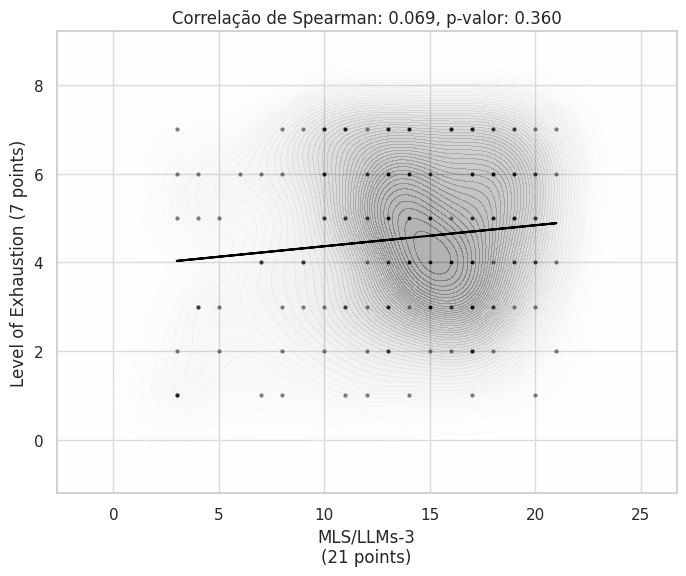

In [23]:
# Calculating the Spearman and Plotando Correlation.
for scale in scales_names:
    # Calculates the correlation of Spearman.
    correlation, p_value = spearmanr(df['Sum_' + scale], df['Fico esgotado quando tenho que ir à universidade.'])
    print(f"Spearman Correlation between Sum_{scale} and level of exhaustion: {correlation:.3f}, p-value: {p_value:.3f}")

    plt.figure(figsize=(8, 6))

    # Calculates the density of KDE.
    sns.kdeplot(x=df['Sum_' + scale], y=df['Fico esgotado quando tenho que ir à universidade.'], cmap="Greys", fill=True, thresh=0, levels=50, alpha=0.3)

    # Adds the scatter chart on top.
    sns.scatterplot(x=df['Sum_' + scale], y=df['Fico esgotado quando tenho que ir à universidade.'], color="black", s=10, legend=False, alpha=0.5)

    # Calculates linear regression coefficients (m = slope, b = interception).
    m, b = np.polyfit(df['Sum_' + scale], df['Fico esgotado quando tenho que ir à universidade.'], 1)

    # Draws the line of regression.
    descriptive_name = nomes_descritivos[scale] + '(21 points)'
    plt.plot(df['Sum_' + scale], m*df['Sum_' + scale] + b, color="black")
    plt.xlabel(descriptive_name)
    plt.ylabel('Level of Exhaustion (7 points)')
    plt.title(f'Correlação de Spearman: {correlation:.3f}, p-valor: {p_value:.3f}')
    plt.grid(True)
    plt.show()


### Feeling Unable for Academic Sucess x LSS/LLMs-6

Spearman Correlation between Sum_scale_disfunctional_strategies and felling unable for academic sucess: 0.444, p-value: 0.000


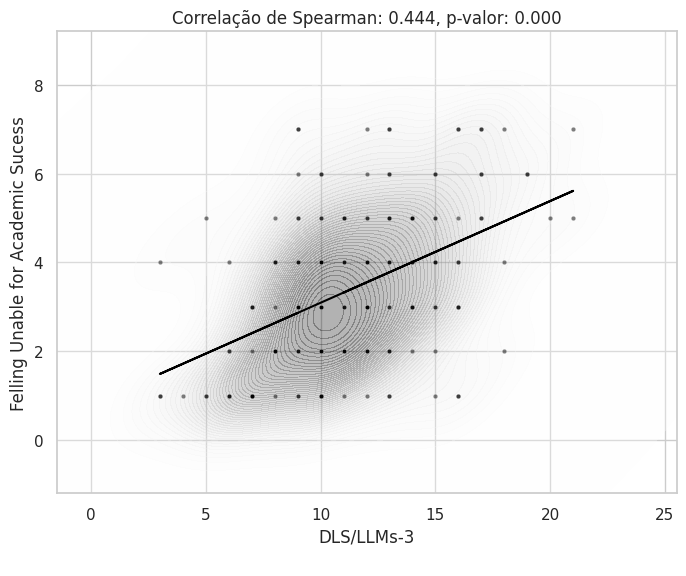

Spearman Correlation between Sum_scale_metacognitive_strategies and felling unable for academic sucess: 0.039, p-value: 0.606


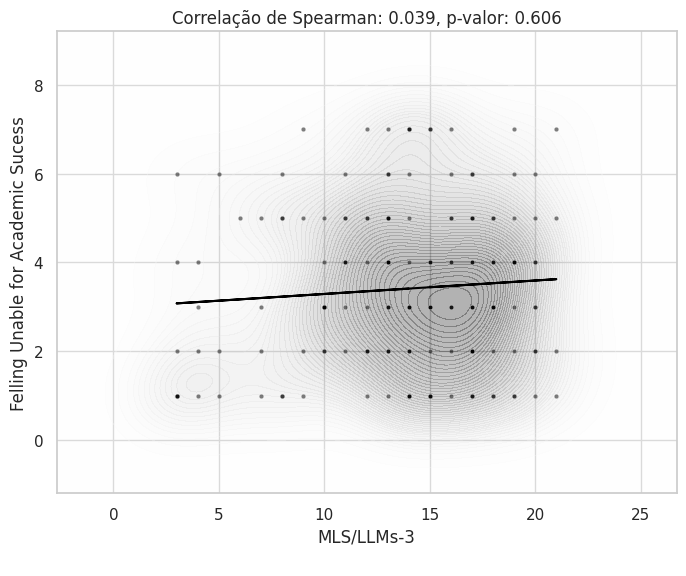

In [24]:
# Calculating the Spearman and Plotando Correlation.
for scale in scales_names:
    # Calculates the correlation of Spearman.
    correlation, p_value = spearmanr(df['Sum_' + scale], df['Nunca me sinto capaz de alcançar meus objetivos acadêmicos.'])
    print(f"Spearman Correlation between Sum_{scale} and felling unable for academic sucess: {correlation:.3f}, p-value: {p_value:.3f}")

    plt.figure(figsize=(8, 6))

    # Calculates the density of KDE.
    sns.kdeplot(x=df['Sum_' + scale], y=df['Nunca me sinto capaz de alcançar meus objetivos acadêmicos.'], cmap="Greys", fill=True, thresh=0, levels=50, alpha=0.3)

    # Adds the scatter chart on top.
    sns.scatterplot(x=df['Sum_' + scale], y=df['Nunca me sinto capaz de alcançar meus objetivos acadêmicos.'], color="black", s=10, legend=False, alpha=0.5)

    # Calculates linear regression coefficients (m = slope, b = interception).
    m, b = np.polyfit(df['Sum_' + scale], df['Nunca me sinto capaz de alcançar meus objetivos acadêmicos.'], 1)

    # Draws the line of regression.
    descriptive_name = nomes_descritivos[scale]
    plt.plot(df['Sum_' + scale], m*df['Sum_' + scale] + b, color="black")
    plt.xlabel(descriptive_name)
    plt.ylabel('Felling Unable for Academic Sucess')
    plt.title(f'Correlação de Spearman: {correlation:.3f}, p-valor: {p_value:.3f}')
    plt.grid(True)
    plt.show()

## 4.6 Confidence about LLMs and LSS/LLMs-6

Spearman Correlation between Sum_scale_disfunctional_strategies and confidence about LLMs: 0.218, p-value: 0.004


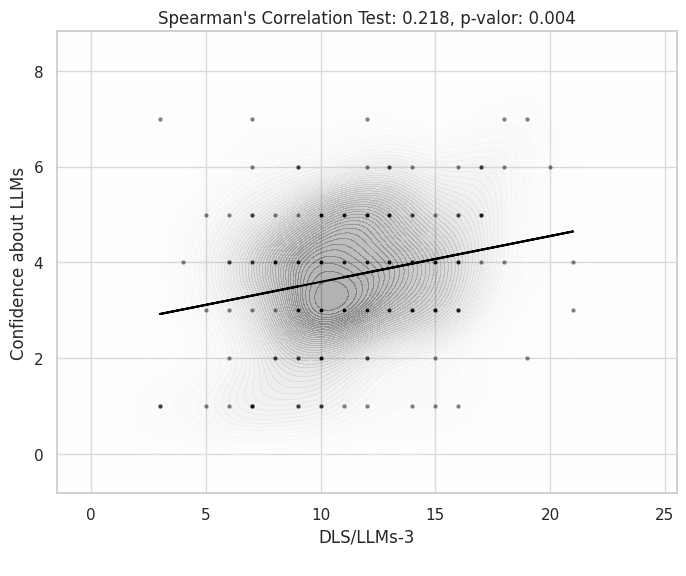

Spearman Correlation between Sum_scale_metacognitive_strategies and confidence about LLMs: 0.447, p-value: 0.000


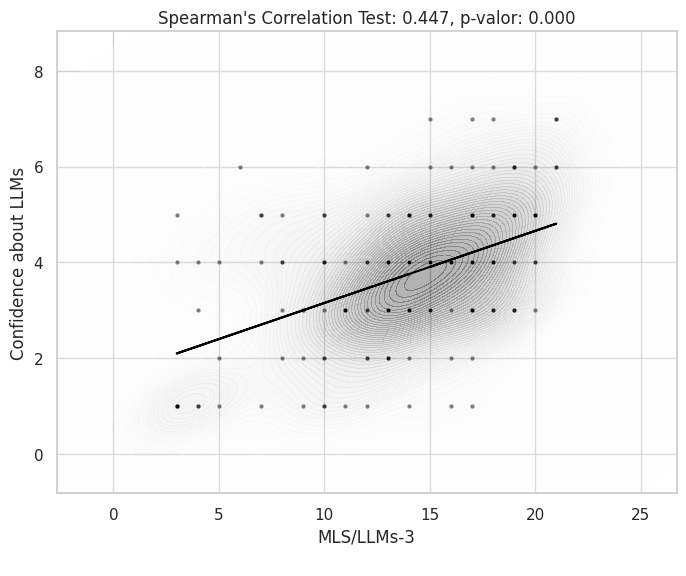

In [25]:
# Calculating the Spearman and Plotando Correlation.
for scale in scales_names:
    # Calculates the correlation of Spearman.
    correlation, p_value = spearmanr(df['Sum_' + scale], df['Me sinto confiante com os textos e/ou códigos gerados por LLMs (ChatGPT, Bard etc.).'])
    print(f"Spearman Correlation between Sum_{scale} and confidence about LLMs: {correlation:.3f}, p-value: {p_value:.3f}")

    plt.figure(figsize=(8, 6))

    # Calculates the density of KDE.
    sns.kdeplot(x=df['Sum_' + scale], y=df['Me sinto confiante com os textos e/ou códigos gerados por LLMs (ChatGPT, Bard etc.).'], cmap="Greys", fill=True, thresh=0, levels=50, alpha=0.3)

    # Adds the scatter chart on top.
    sns.scatterplot(x=df['Sum_' + scale], y=df['Me sinto confiante com os textos e/ou códigos gerados por LLMs (ChatGPT, Bard etc.).'], color="black", s=10, legend=False, alpha=0.5)

    # Calculates linear regression coefficients (m = slope, b = interception).
    m, b = np.polyfit(df['Sum_' + scale], df['Me sinto confiante com os textos e/ou códigos gerados por LLMs (ChatGPT, Bard etc.).'], 1)

    # Draws the line of regression.
    descriptive_name = nomes_descritivos[scale]
    plt.plot(df['Sum_' + scale], m*df['Sum_' + scale] + b, color="black")
    plt.xlabel(descriptive_name)
    plt.ylabel('Confidence about LLMs')
    plt.title(f'Spearman\'s Correlation Test: {correlation:.3f}, p-valor: {p_value:.3f}')
    plt.grid(True)
    plt.show()